In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import scipy
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from glob import glob
from datetime import datetime
import os
import pwlf
import sklearn
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
#Combine all the raw files and export it to main.csv

'''
all_csv = [file_name for file_name in os.listdir(os.getcwd()) if '.csv' in file_name]

li = []

for filename in all_csv:
    df = pd.read_csv(filename, index_col=None, header=0, parse_dates=True, infer_datetime_format=True)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.to_csv('main.csv', index=False)
'''

"\nall_csv = [file_name for file_name in os.listdir(os.getcwd()) if '.csv' in file_name]\n\nli = []\n\nfor filename in all_csv:\n    df = pd.read_csv(filename, index_col=None, header=0, parse_dates=True, infer_datetime_format=True)\n    li.append(df)\n\nframe = pd.concat(li, axis=0, ignore_index=True)\nframe.to_csv('main.csv', index=False)\n"

In [3]:
#Load the dataset
df = pd.read_csv("districts.csv")

In [4]:
#No of rows and columns in df
print("Number of Rows and Columns in df", df.shape)

Number of Rows and Columns in df (238288, 8)


In [5]:
df.head()

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested
0,2020-04-26,Andaman and Nicobar Islands,Unknown,33,11,0,0,2679.0
1,2020-04-26,Andhra Pradesh,Anantapur,53,14,4,0,NaN
2,2020-04-26,Andhra Pradesh,Chittoor,73,13,0,0,NaN
3,2020-04-26,Andhra Pradesh,East Godavari,39,12,0,0,NaN
4,2020-04-26,Andhra Pradesh,Guntur,214,29,8,0,NaN


In [6]:
#Print the last 5 rows of the dataset df
print("Last 5 rows of dataset df")
df.tail()

Last 5 rows of dataset df


,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested
238283,2021-05-02,West Bengal,Purba Bardhaman,20231,16668,111,0,NaN
238284,2021-05-02,West Bengal,Purba Medinipur,28445,24202,299,0,NaN
238285,2021-05-02,West Bengal,Purulia,14067,10893,65,0,NaN
238286,2021-05-02,West Bengal,South 24 Parganas,54352,45764,800,0,NaN
238287,2021-05-02,West Bengal,Uttar Dinajpur,10441,8325,93,0,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238288 entries, 0 to 238287
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       238288 non-null  object 
 1   State      238288 non-null  object 
 2   District   238288 non-null  object 
 3   Confirmed  238288 non-null  int64  
 4   Recovered  238288 non-null  int64  
 5   Deceased   238288 non-null  int64  
 6   Other      238288 non-null  int64  
 7   Tested     174167 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 14.5+ MB


In [8]:
#Checking the datatypes of all the columns in df
#print('Datatypes of all columns in df \n\n',df.dtypes)
df.isnull().sum()


Date             0
State            0
District         0
Confirmed        0
Recovered        0
Deceased         0
Other            0
Tested       64121
dtype: int64

In [9]:
df['Date'] = pd.to_datetime(df['Date'],format = '%Y-%m-%d')

In [10]:
#Dropping irrevelant columns in df
df = df.drop(['Tested','Other','Recovered','Deceased'],axis = 1)


In [11]:
#Display rows from 100 to 125
print("Rows from 100 to 125 of dataset df")
df[100:105]

Rows from 100 to 125 of dataset df


,Date,State,District,Confirmed
100,2020-04-26,Haryana,Yamunanagar,3
101,2020-04-26,Jharkhand,Bokaro,10
102,2020-04-26,Jharkhand,Deoghar,2
103,2020-04-26,Jharkhand,Dhanbad,2
104,2020-04-26,Jharkhand,Garhwa,3


In [12]:
#No of rows and columns in df
print("Number of Rows and Columns in df", df.shape)

Number of Rows and Columns in df (238288, 4)


In [13]:
#Check null values in df
print("Number of null values in df\n\n", df.isnull().sum())

Number of null values in df

 Date         0
State        0
District     0
Confirmed    0
dtype: int64


In [14]:
#Info of df dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238288 entries, 0 to 238287
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       238288 non-null  datetime64[ns]
 1   State      238288 non-null  object        
 2   District   238288 non-null  object        
 3   Confirmed  238288 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.3+ MB


In [15]:
def daily(sorted_data,district):
    temp = sorted_data.loc[sorted_data["District"] == district[0]].copy()
    temp['Confirmed'] = temp['Confirmed'].diff()
    temp['Confirmed'] = temp['Confirmed'].fillna(0)
    temp = temp.astype({"Confirmed": int})
    for i in range(1,len(district)):
        temp1 = sorted_data.loc[sorted_data["District"] == district[i]].copy()
        temp1['Confirmed'] = temp1['Confirmed'].diff()
        temp1['Confirmed'] = temp1['Confirmed'].fillna(0)
        temp1 = temp1.astype({"Confirmed": int})
        temp = temp.append(temp1)
    return temp

In [16]:
dist_l = ['Bengaluru Urban','Chennai','Mumbai','Thiruvananthapuram','Delhi']


In [17]:
df = daily(df,dist_l)

In [18]:
df

,Date,State,District,Confirmed
132,2020-04-26,Karnataka,Bengaluru Urban,0
547,2020-04-27,Karnataka,Bengaluru Urban,1
972,2020-04-28,Karnataka,Bengaluru Urban,1
1402,2020-04-29,Karnataka,Bengaluru Urban,0
1836,2020-04-30,Karnataka,Bengaluru Urban,10
...,...,...,...,...
235126,2021-04-28,Delhi,Delhi,25986
235780,2021-04-29,Delhi,Delhi,24235
236434,2021-04-30,Delhi,Delhi,27047
237088,2021-05-01,Delhi,Delhi,25219


# The entire dataset is divided into four quarters

* First quarter    : Dated between 01/01/2020 and 31/03/2020
* Second quarter : Dated between 01/04/2020 and 30/06/2020
* Third quarter  : Dated between 01/07/2020 and 30/09/2020
* Fourth quarter : Dated between 01/10/2020 and 31/12/2020



In [19]:
#Function to generate dataframe based on start and end dates 
def quarter_generator(df, start_date:str ,end_date:str):

    # To convert the input taken from user into datetime objects
    
    start_date1 = pd.to_datetime(start_date, format = '%d-%m-%Y', errors = 'ignore')  #start_date1 is the datetime object for start_date
    end_date1 = pd.to_datetime(end_date, format = '%d-%m-%Y', errors = 'ignore')      #end_date1 is the datetime object for end_date
    
    
    # To obtain the quarter based on start_date1 and end_date1
    
    quarter = df.loc[df['Date'] <= end_date1]
    quarter = quarter.loc[quarter['Date'] >= start_date1]  
    return quarter

In [20]:
#Quarter 1 between 01/01/2020 and 31/03/2020

quarter1 = quarter_generator(df, "01-01-2020","31-03-2020")
print("Length of quarter1 from 01-01-2020 to 31-03-2020 is", quarter1.shape)
quarter1.head()

Length of quarter1 from 01-01-2020 to 31-03-2020 is (0, 4)


,Date,State,District,Confirmed


In [21]:
quarter1_21 = quarter_generator(df, "01-01-2021","25-04-2021")
#print("Length of quarter4 from 01-10-2020 to 30-11-2020 is", quarter4.shape)
t1 = quarter1_21
quarter1_21.loc[quarter1_21['District'] == "Thiruvananthapuram"]

,Date,State,District,Confirmed
158781,2021-01-01,Kerala,Thiruvananthapuram,386
159434,2021-01-02,Kerala,Thiruvananthapuram,290
160087,2021-01-03,Kerala,Thiruvananthapuram,282
160740,2021-01-04,Kerala,Thiruvananthapuram,222
161393,2021-01-05,Kerala,Thiruvananthapuram,388
...,...,...,...,...
230707,2021-04-21,Kerala,Thiruvananthapuram,1881
231361,2021-04-22,Kerala,Thiruvananthapuram,2283
232015,2021-04-23,Kerala,Thiruvananthapuram,2345
232669,2021-04-24,Kerala,Thiruvananthapuram,2383


In [22]:
quarter2_21 = quarter_generator(df, "26-04-2021","02-05-2021")
#print("Length of quarter4 from 01-10-2020 to 30-11-2020 is", quarter4.shape)
# quarter2_21 = quarter2_21.loc[(quarter2_21['District']  == 'Bengaluru Urban') | (quarter2_21['District']  == 'Delhi')\
# | (quarter2_21['District'] == 'Chennai') | (quarter2_21['District'] == 'Thiruvananthapuram') | \
# (quarter2_21['District'] == 'Mumbai')]
quarter2_21.loc[quarter2_21['District'] == 'Thiruvananthapuram']

,Date,State,District,Confirmed
233977,2021-04-26,Kerala,Thiruvananthapuram,2272
234631,2021-04-27,Kerala,Thiruvananthapuram,2892
235285,2021-04-28,Kerala,Thiruvananthapuram,3210
235939,2021-04-29,Kerala,Thiruvananthapuram,3940
236593,2021-04-30,Kerala,Thiruvananthapuram,3535
237248,2021-05-01,Kerala,Thiruvananthapuram,3111
237903,2021-05-02,Kerala,Thiruvananthapuram,3424


In [23]:
#Quarter 4 between 01/10/2020 and 31/12/2020


quarter4 = quarter_generator(df, "01-10-2020","31-12-2020")
t2 = quarter4.append(t1)
print("Length of quarter4 from 01-10-2020 to 30-11-2020 is", quarter4.shape)
quarter4

Length of quarter4 from 01-10-2020 to 30-11-2020 is (460, 4)


,Date,State,District,Confirmed
98628,2020-10-01,Karnataka,Bengaluru Urban,4853
99283,2020-10-02,Karnataka,Bengaluru Urban,4259
99938,2020-10-03,Karnataka,Bengaluru Urban,3925
100592,2020-10-04,Karnataka,Bengaluru Urban,4340
101246,2020-10-05,Karnataka,Bengaluru Urban,2189
...,...,...,...,...
155357,2020-12-27,Delhi,Delhi,757
156010,2020-12-28,Delhi,Delhi,564
156663,2020-12-29,Delhi,Delhi,703
157316,2020-12-30,Delhi,Delhi,677


In [24]:
#Quarter 3 between 01/07/2020 and 30/09/2020

quarter3 = quarter_generator(df ,"01-07-2020","30-09-2020")
t3 = quarter3.append(t2)
print("Length of quarter3 from 01-07-2020 to 30-09-2020 is", quarter3.shape)
quarter3.head()

Length of quarter3 from 01-07-2020 to 30-09-2020 is (460, 4)


,Date,State,District,Confirmed
38453,2020-07-01,Karnataka,Bengaluru Urban,735
39108,2020-07-02,Karnataka,Bengaluru Urban,889
39763,2020-07-03,Karnataka,Bengaluru Urban,994
40418,2020-07-04,Karnataka,Bengaluru Urban,1172
41072,2020-07-05,Karnataka,Bengaluru Urban,1235


In [25]:
#Quarter 2 between 01/04/2020 and 30/06/2020

quarter2 = quarter_generator(df, "21-04-2020","30-06-2020")
t4 = quarter2.append(t3)
print("Length of quarter2 from 01-04-2020 to 30-06-2020 is", quarter2.shape)
quarter2.head()

Length of quarter2 from 01-04-2020 to 30-06-2020 is (330, 4)


,Date,State,District,Confirmed
132,2020-04-26,Karnataka,Bengaluru Urban,0
547,2020-04-27,Karnataka,Bengaluru Urban,1
972,2020-04-28,Karnataka,Bengaluru Urban,1
1402,2020-04-29,Karnataka,Bengaluru Urban,0
1836,2020-04-30,Karnataka,Bengaluru Urban,10


# DATA PRE-PROCESSING FOR UPDATING QUARTERS

## Steps performed:
### 1. Group by the date
### 2. Calculate the recovered, deceased, confirmed and active cases for each date
### 3. Add two more columns to include number of states and districts where cases were found on the  particular date

## We have used two different functions to do this because of the irregularity of data between data uptil 26th April, 2020 and data after 26th April, 2020

* ### load_first_half : This function is used to generate updated quarter for the first quarter and second quarter up until 26th April, 2020

* ### load_sec_half : This function is used to generate updated quarter for the third and fourth quarter as well as second quarter after 26th April, 2020

In [26]:
q_o = [t1,t2,t3,t4]
q_s = ["t1","t2","t3","t4"]
dist_d = {}


In [27]:
for district in dist_l:
    if(district not in dist_d):
        dist_d[district] = {}


In [28]:
for district in dist_d.keys():
    dic = {}
    for o,s in zip(q_o,q_s):
        temp = o.loc[o['District'] == district]
        dic[s] = {"df" : temp.reset_index(drop = True)}
    dist_d[district] = dic


In [29]:
dist_d['Mumbai']['t2']['df']

,Date,State,District,Confirmed
0,2020-10-01,Maharashtra,Mumbai,2352
1,2020-10-02,Maharashtra,Mumbai,2440
2,2020-10-03,Maharashtra,Mumbai,2402
3,2020-10-04,Maharashtra,Mumbai,1190
4,2020-10-05,Maharashtra,Mumbai,1836
...,...,...,...,...
202,2021-04-21,Maharashtra,Mumbai,7654
203,2021-04-22,Maharashtra,Mumbai,7367
204,2021-04-23,Maharashtra,Mumbai,7199
205,2021-04-24,Maharashtra,Mumbai,5867


In [30]:
#Exponential

In [31]:
from statsmodels.tsa.api import SimpleExpSmoothing
%matplotlib inline

In [32]:
#fit the models
for district in dist_d:
    for train_data in dist_d[district]:
        t = dist_d[district][train_data]
        y_ses = pd.Series(t['df']['Confirmed'].to_list(),t['df']['Date'].to_list())
        t['series_data'] = y_ses
        t['fit'] = SimpleExpSmoothing(y_ses).fit()
        t['alpha'] = t['fit'].model.params['smoothing_level']
    dist_d[district]["best"] = None

C:\Users\kethan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\kethan\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\kethan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\kethan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\kethan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D

In [33]:
def train_val(df,alpha):
    pred = [df[0]]
    for i in range(1,len(df)+1):
        val = alpha*df[i-1] + ((1-alpha)*(pred[i-1]))
        pred.append(int(val))
    return pred

In [34]:
def predict_val(df_train,alpha,n):
    pred = df_train[len(df_train)-1]
    actual = alpha*pred
    for i in range(0,n-1):
        val = alpha*actual + ((1-alpha)*(pred))
        pred = val
        actual = alpha*pred
        df_train.append(int(val))
    return df_train

In [35]:
#Creating dataframe
def predit(all_data,dist,alpha,n):
    final_table = pd.DataFrame(columns = ['Date', 'Actual Confirmed']) 
    
    dates = pd.date_range(start="26/04/2021",periods=n)
    #Extracting values according to position
    final_table["Date"] = all_data.iloc[:,0]
    #final_table['Actual Confirmed'] = all_data.iloc[:,1]
        
        
    #append dates
    new = pd.date_range(final_table.Date.iloc[-1], periods=n+1)
    df1 = pd.DataFrame(new[1:], columns=['Date'])
    final_table = final_table.append(df1, ignore_index=True)

    dates  = dates.to_frame().reset_index(drop = True)
    dates = dates.rename(columns= {0: 'Date'})
    #print(dates)
    new1 = quarter2_21.loc[quarter2_21['District'] == dist].reset_index(drop = True)
    new1 = new1.loc[new1["Date"] <= dates.at[len(dates)-1,'Date']]
#     new1.index = new1.index + len(all_data)
    
#     final_table['Actual Confirmed'] = new1.iloc[:,1]
    
    new2 = new1["Confirmed"].to_list()
    #print(new1)
    new3 = all_data['Confirmed'].to_list()
    new3.extend(new2)
    
    simple = pd.DataFrame(new3,columns = ['Confirmed'])
#     simple['Confirmed'] = final_table['Actual Confirmed']

#   simple = simple.replace([i for i in range(len(all_data),len(all_data)+n)],new2)
    
    final_table['Actual Confirmed'] = simple['Confirmed']
    
    #print(all_data['Confirmed'].to_list())
    predicted_train = train_val(all_data['Confirmed'].to_list(),alpha)

    predicted_test = predict_val(predicted_train,alpha,n)

    predicted_test_df = pd.DataFrame(predicted_test, columns = ['Predicted Confirmed']) 
    
    final_table['Predicted Confirmed'] = predicted_test_df['Predicted Confirmed']
    mn = final_table['Predicted Confirmed'].mean()
    std = final_table['Predicted Confirmed'].std()
    final_table['Min Predicted Confirmed'] = (final_table['Predicted Confirmed'] - 2 * std).map(int)
    final_table['Max Predicted Confirmed'] = (final_table['Predicted Confirmed'] + 2 * std).map(int)
    final_table["Absolute Error"] = (final_table['Actual Confirmed'] - final_table['Predicted Confirmed']).map(abs)
    final_table["Accuracy"] = (1 - (final_table['Absolute Error']/final_table['Actual Confirmed'] ))*100
    final_table['% of incorrect prediction'] = (final_table['Absolute Error']/final_table['Actual Confirmed'])*100
    return final_table

In [36]:
n = int(input('Enter the number of days to predict :'))

Enter the number of days to predict :7


In [37]:
#choose train data set's aplha val
final_table = predit(dist_d['Thiruvananthapuram']['t4']['df'],"Bengaluru Urban",\
                     dist_d['Thiruvananthapuram']['t4']['alpha'],7)
#final_table[len(dist_d['Bengaluru Urban']['t4']['df']):].reset_index(drop=True)


In [38]:
for dist in dist_d.keys():
    predicted_max = 0
    for train in dist_d[dist]:
        if (train != "best"):
            predicted = predit(dist_d[dist][train]['df'],dist,dist_d[dist][train]['alpha'],n)
            if(predicted[len(dist_d[dist][train]['df']):]['Accuracy'].mean() > predicted_max):
                dist_d[dist]["best"] = predicted[len(dist_d[dist][train]['df']):].reset_index(drop = True)
                predicted_max = predicted[len(dist_d[dist][train]['df']):]['Accuracy'].mean()
    dist_d[dist]['best'].to_csv("ses_"+dist[:3]+".csv")

# Confidence interval with 95% confidence level

In [39]:
dist_d["Delhi"]["best"]

,Date,Actual Confirmed,Predicted Confirmed,Min Predicted Confirmed,Max Predicted Confirmed,Absolute Error,Accuracy,% of incorrect prediction
0,2021-04-26,20201,22979,7234,38723,2778,86.248206,13.751794
1,2021-04-27,24149,22106,6361,37850,2043,91.540022,8.459978
2,2021-04-28,25986,21267,5522,37011,4719,81.840222,18.159778
3,2021-04-29,24235,20459,4714,36203,3776,84.419228,15.580772
4,2021-04-30,27047,19682,3937,35426,7365,72.769623,27.230377
5,2021-05-01,25219,18935,3190,34679,6284,75.082279,24.917721
6,2021-05-02,20394,18216,2471,33960,2178,89.320388,10.679612


In [40]:
#test data for plot
test_df = final_table.loc[final_table['Date'] >= "21/04/2021"]
x2 = np.array(test_df["Date"])
y2 = np.array(test_df["Actual Confirmed"])
y_hat = np.array(test_df["Predicted Confirmed"])


for i in range(1,n+1): 
    new_frame = dist_d["Thiruvananthapuram"]["best"].reset_index(drop = True)
    print("Number of days predicted", i)
    for j in range(0,i):
        print("Predicted Value for day",j+1," is ",new_frame.at[j,'Predicted Confirmed']," with ",\
              new_frame.at[j,'Accuracy'],"% Accuracy", sep = "")
    #print("Accuracy", new_frame.at[i,'% of correct prediction'])
    print("Avg Accuracy", new_frame['Accuracy'][:i].mean())
    print("Min Accuracy", new_frame['Accuracy'][:i].min())
    print("Max Accuracy", new_frame['Accuracy'][:i].max())
    print()


Number of days predicted 1
Predicted Value for day1 is 2021 with 88.9524647887324% Accuracy
Avg Accuracy 88.9524647887324
Min Accuracy 88.9524647887324
Max Accuracy 88.9524647887324

Number of days predicted 2
Predicted Value for day1 is 2021 with 88.9524647887324% Accuracy
Predicted Value for day2 is 2010 with 69.50207468879668% Accuracy
Avg Accuracy 79.22726973876453
Min Accuracy 69.50207468879668
Max Accuracy 88.9524647887324

Number of days predicted 3
Predicted Value for day1 is 2021 with 88.9524647887324% Accuracy
Predicted Value for day2 is 2010 with 69.50207468879668% Accuracy
Predicted Value for day3 is 2000 with 62.30529595015577% Accuracy
Avg Accuracy 73.58661180922827
Min Accuracy 62.30529595015577
Max Accuracy 88.9524647887324

Number of days predicted 4
Predicted Value for day1 is 2021 with 88.9524647887324% Accuracy
Predicted Value for day2 is 2010 with 69.50207468879668% Accuracy
Predicted Value for day3 is 2000 with 62.30529595015577% Accuracy
Predicted Value for day4 

In [41]:
#test data for plot
test_df = dist_d['Bengaluru Urban']['best']
x2 = np.array(test_df["Date"].dt.date)
y2 = np.array(test_df["Actual Confirmed"])
y_hat = np.array(test_df["Predicted Confirmed"])


In [42]:
#Test data for Quarter 1 of 2021
q1_2021 = pd.date_range(start = "26/04/2021",periods=n)
ymin = np.array(test_df['Min Predicted Confirmed'])
ymax = np.array(test_df['Max Predicted Confirmed'])

In [43]:
print(len(y2),len(y_hat),len(ymin),len(ymax),len(q1_2021))

7 7 7 7 7


In [44]:
def plot_df_test(x,y,xHat,yHat):
     #Plotting the values
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(4)
    plt.plot(x, y, color = 'blue');
    plt.plot(xHat, yHat, color = 'red');
    
    
    #plt.scatter(, y) 
    #sns.set(rc={'figure.figsize':(15,10)})
    #sns.scatterplot(x, y)
    plt.title("Actual vs Predicted values for Confirmed Cases") 
    plt.xlabel('Date') 
    plt.ylabel('Confirmed Cases') 
    
   
    plt.show()

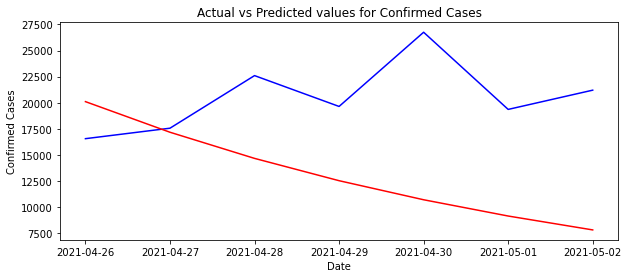

In [45]:
plot_df_test(x2,y2,q1_2021,y_hat)